In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense
from tensorflow.keras import backend as K

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile,join


In [15]:
img_width=150
img_height=150

train_data_dir=r'C:\Users\Lenovo\Downloads\jeans\augmented_image_1\training'
validation_data_dir=r'C:\Users\Lenovo\Downloads\jeans\augmented_image_1\validation'
train_samples=120
validation_samples=30
epochs=5
batch_size=20
if K.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)


In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
import tensorflow.keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(lr=.0001),metrics=['accuracy'])


In [18]:
train_datagen=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [28]:
train_generator=train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width,img_height),
batch_size=batch_size,
class_mode='binary')

Found 236 images belonging to 2 classes.


In [29]:
print(train_generator.class_indices)

{'jeans': 0, 't-shirt': 1}


In [30]:
imgs,labels=next(train_generator)

In [31]:
from  skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

20
0.0


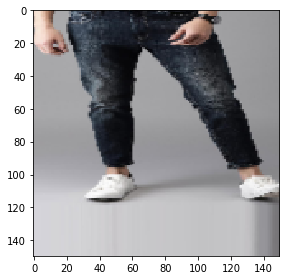

1.0


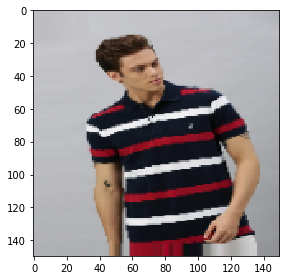

0.0


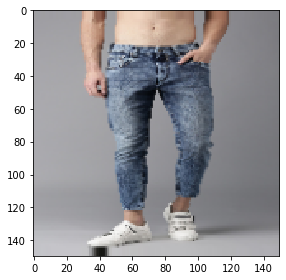

0.0


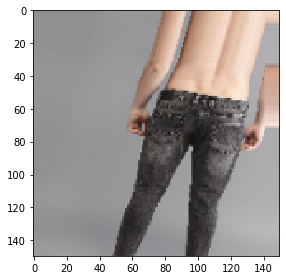

0.0


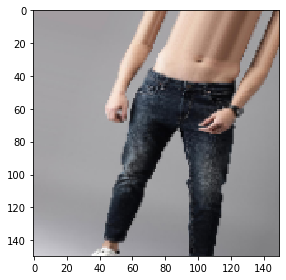

1.0


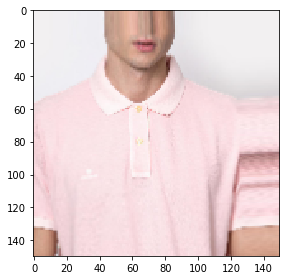

0.0


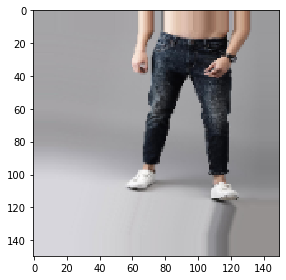

1.0


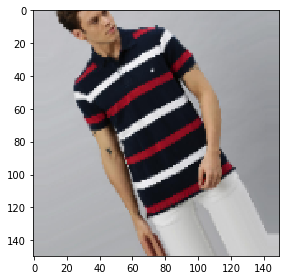

0.0


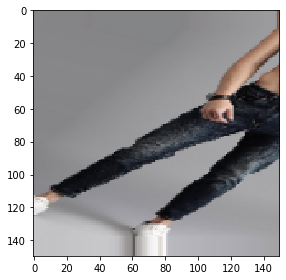

0.0


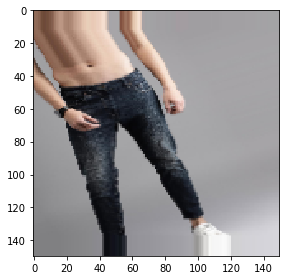

0.0


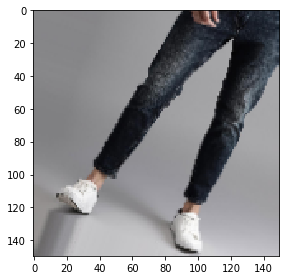

0.0


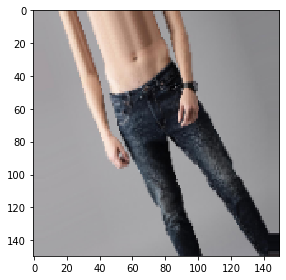

0.0


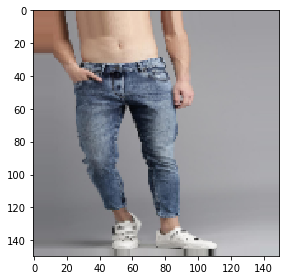

0.0


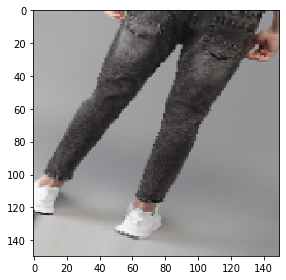

0.0


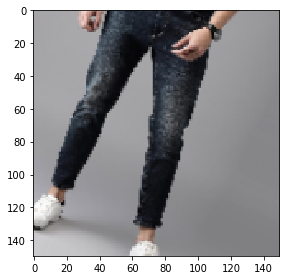

1.0


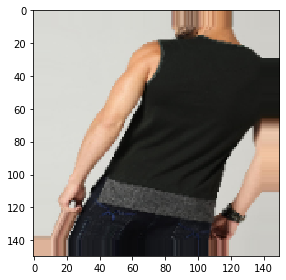

1.0


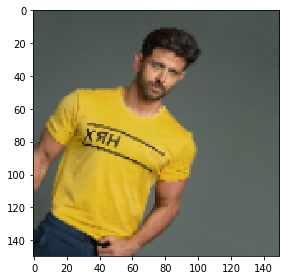

0.0


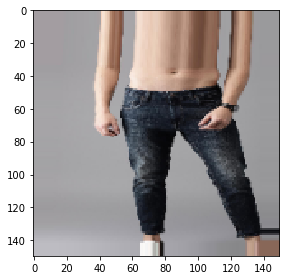

1.0


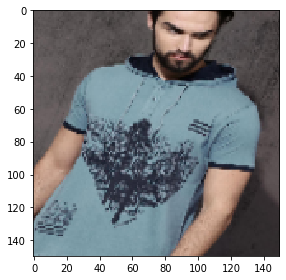

0.0


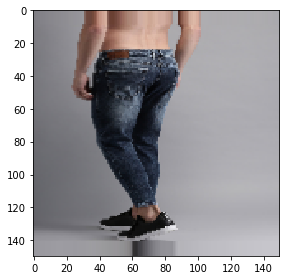

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

image_batch,label_batch=train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [34]:
validation_generator=test_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width,img_height),
batch_size=batch_size,
class_mode='binary')


Found 43 images belonging to 2 classes.


In [35]:
history=model.fit_generator(
train_generator,
steps_per_epoch=train_samples,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_samples)

Epoch 1/5
12/12 [==============================] - 18s 2s/step - loss: 0.5653 - acc: 0.7373 - val_loss: 0.6482 - val_acc: 0.5814
Epoch 2/5
12/12 [==============================] - 16s 1s/step - loss: 0.4826 - acc: 0.8475 - val_loss: 0.5794 - val_acc: 0.7907
Epoch 3/5
12/12 [==============================] - 16s 1s/step - loss: 0.4405 - acc: 0.8220 - val_loss: 0.5092 - val_acc: 1.0000
Epoch 4/5
12/12 [==============================] - 16s 1s/step - loss: 0.3578 - acc: 0.9153 - val_loss: 0.6260 - val_acc: 0.6279
Epoch 5/5
12/12 [==============================] - 16s 1s/step - loss: 0.3489 - acc: 0.8814 - val_loss: 0.6537 - val_acc: 0.6279


In [33]:
predict_dir_path=r''#enter your testing image directory path here and u will get the prediction
onlyfiles=[f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path,f))]
print(onlyfiles)

FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

In [ ]:
from tensorflow.keras.preprocessing import image
dog_counter=0
cat_counter=0
for file in onlyfiles:
    img=image.load_img(predict_dir_path+file,target_size=(img_width,img_height))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=o)
    
    images=np.vstack([x])
    classes=model.predict_classes(images,batch_size=10)
    classes=classes[0][0]
    
    if classes == 0:
        print(file +": " + 'cat')
        cat_counter+=1
    else:
        print(file + ":" + 'dog')
        dog_counter+=1
print("Total Dogs :", dog_counter) 
print("Total Cats:",cat_counter)